<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Interpolation</center></span>
</div>
Interpolation is basically a mathematical operation which consists in building a curve according to a range of data.  
In the daily life, this process is one of the base of Machine Learning.  
For example with a smart car, it aims to be driven by itself, without the help of the human. 
But, to realize this task, it needs an important amount of data like "How humans drive" to learn from us and get the best behavior while machine is driving.  
In this case "learning" means recognizing that the current new situation is close to others situations this it already know.  
Then, it has to act "like" those simmilar situation.

Here we will imagine that we got some raw data from the following function:   
$$ f(x) = \sqrt{4x} $$

The objective is to find an approximation of this function knowing only few points.  

Define this function

In [56]:
import numpy as np
def function(x):
    return np.sqrt(4.*x)

The following cell should work

<IPython.core.display.Javascript object>


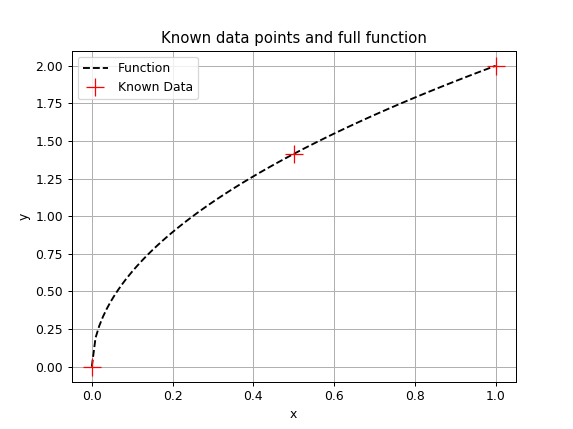

In [208]:
%matplotlib notebook
import matplotlib.pyplot as plt

xmin, xmax = 0., 1.0
x_interpol = np.linspace(xmin,xmax,3)
Npts = 110
x = np.linspace(xmin,xmax,Npts)
y = function(x)
y_interpol = function(x_interpol)

plt.figure("1st fig")
plt.plot(x,y,'k--',label='Function')
plt.plot(x_interpol,y_interpol,'+r',markersize=15,label='Known Data')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Known data points and full function')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Linear interpolation

The first idea is to assimilate the function to a line between each points.

First, we can compute two lines 
- $a_1 x + b_1 = 0$ that approximate the left part of the curve and pass through the two first data points
- $a_2 x + b_2 = 0$ that approximate the right part of the curve and pass through the two last data points  


Write a function `linear_interp(x, y)` that, given 3 points, compute $a_1$, $b_1$, $a_2$ and $b_2$.

In [60]:
def linear_interp(x,y):
    a1 = (y[1]-y[0])/(x[1]-x[0])
    b1 = y[0]-a1*x[0]
    a2 = (y[2]-y[1])/(x[2]-x[1])
    b2 = y[1]-a2*x[1]
    return a1, b1, a2, b2

Given a point `x` we can detect if we are on the left or on the right of the curve and select wich line to use 

Write a function `linear_eval(x, a1,b1,a2,b2)` that compute the value of the approximation on x 

In [62]:
def linear_eval( x, a1, b1, a2, b2):
    xmid=(b2-b1)/(a1-a2)
    if x<xmid:
        y=a1*x+b1
    else:
        y=a2*x+b2
    return y


If you write correct functions, the following cell should work, and let you appreciate the accuracy of the approximation.  
We use the following function to vectorize the array received from the linear eval function :  

vlinear_eval=np.vectorize(linear_eval)

<IPython.core.display.Javascript object>


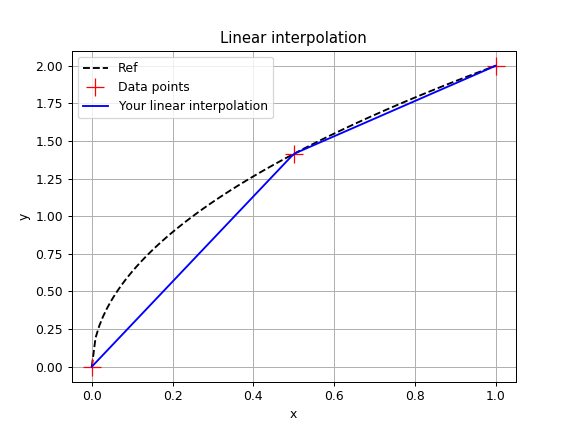

In [63]:
Npts = 110
x = np.linspace(xmin,xmax,Npts)
y_linear = vlinear_eval(x, *linear_interp(x_interpol, y_interpol))

plt.figure("2nd fig")
plt.plot(x,y,'k--',label='Ref')
plt.plot(x_interpol,y_interpol,'+r',markersize=15,label='Data points')
plt.plot(x,y_linear,'-b',label='Your linear interpolation')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Linear interpolation')
plt.legend(loc='best')
plt.show()

# Quadratic interpolation

In order to enhance our results we can replace the 1st order polynomial (lines) by 2nd order ones.

For that we need to solve the following system of equation:

$$
\begin{align}
ax_{0}^2 + bx_{0} + c &= f(x_{0})\\
ax_{1}^2 + bx_{1} + c &= f(x_{1})\\
ax_{2}^2 + bx_{2} + c &= f(x_{2})\\
\end{align}
$$

Find manually $a,b,c$

In [65]:
c=0.
b=-2.+4.*np.sqrt(2.)
a=-4.+4.*np.sqrt(2.)

Write a function `poly_eval(x,a,b,c)` that evaluate your polynomial on `x`

In [68]:
def poly_eval(x,a,b,c):
    y=a*np.power(x,2)+b*x+c
    return y

If you write correct functions, the following cell should work, and let you appreciate the accuracy of the approximation

<IPython.core.display.Javascript object>


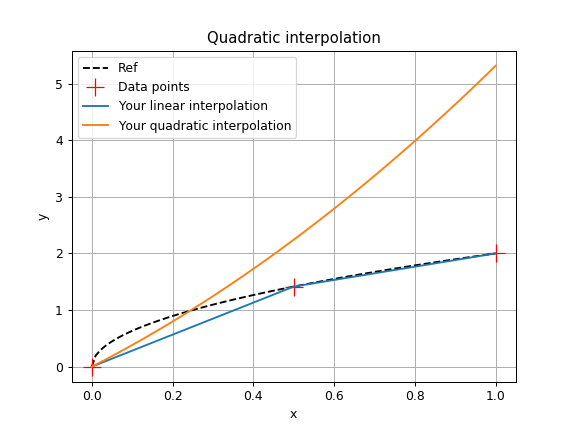

In [69]:
Npts = 110
x = np.linspace(xmin,xmax,Npts)
#Je n'ai pas compris pourquoi tu as demandé à Nathan de nous signifier qu'il y avait un truc à ajouter ici
y_pol = poly_eval(x, a, b, c)
plt.figure("3nd fig")
plt.plot(x,y,'k--',label='Ref')
plt.plot(x_interpol,y_interpol,'+r',markersize=15,label='Data points')
plt.plot(x,y_linear,label='Your linear interpolation')
plt.plot(x,y_pol,label='Your quadratic interpolation')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Quadratic interpolation')
plt.legend(loc='best')
plt.show()

From now on we will work on the Runge function  
$$\text{runge}(x) = \frac{1}{1 + 25 x^{2}}$$
with 3 data points on $x=-1$, $x=0$ and $x=1$.

Define this function

In [71]:
def runge(x):
        return 1./(1.+25.*np.power(x,2))


Recompute a quadratic approximation on this new function.

If you don't want to loose your mind again doing this manually, you can also use python to solve it.

First, compute 
- the vector $Y=f(x_0), f(x_1), f(x_2))$


- the matrix $M = \begin{bmatrix}
x_0^2 & x_0& 1\\
x_1^2 & x_1& 1\\
x_2^2 & x_2& 1\\
\end{bmatrix}$

In [81]:
x_raw=[-1,0,1]
y_raw=runge(x_raw)
Matrix=np.array([[1,-1,1],[0,0,1],[1,1,1]])

You can now compute the coeficients `coeffs` of your polynom using `np.linalg.solve(M, Y)`

In [90]:
coeffs=np.linalg.solve(M, Y)

If you write correct functions, the following cell should work.

<IPython.core.display.Javascript object>


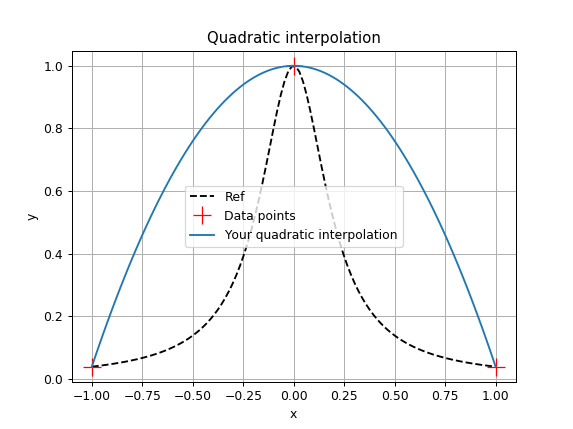

In [95]:
Npts = 110
xmin =-1.
xmax = 1.
x = np.linspace(xmin,xmax,Npts)
y = runge(x)
y_pol = poly_eval(x, *coeffs)

plt.figure("4th fig")
plt.plot(x,y,'k--',label='Ref')
plt.plot(x_raw,y_raw,'+r',markersize=15,label='Data points')
plt.plot(x,y_pol,label='Your quadratic interpolation')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Quadratic interpolation')
plt.legend(loc='best')
plt.show()

# High order polynomials
  
Hey but what stop us from taking more data points and using higher order polynomials ? Nothing !

Write a new function `coefs(x,y)` that will use the previous method to compute the highest order polynomial possible with given data points

You might use `len(x)` in order to know the number of points.

In [176]:
def coefs(x,y):
    coeffs=[]
    M=np.ones((len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
                M[i,j]=np.power(x[i],len(x)-j-1)
    coeffs=np.linalg.solve(M, y)
    return coeffs

Then, write a function `poly_eval2(x, coefs)` that evaluate a polynomial of arbitrary order on `x` 

In [178]:
def poly_eval2(x, coefs):
    y = 0
    for j in range(len(coefs)):
        y += coefs[j]*np.power(x,len(coefs)-j-1)
    return y

If your functions are well written the following cell should work.  
Play with the number of data points `npoints`.  
What is happenning ?

<IPython.core.display.Javascript object>


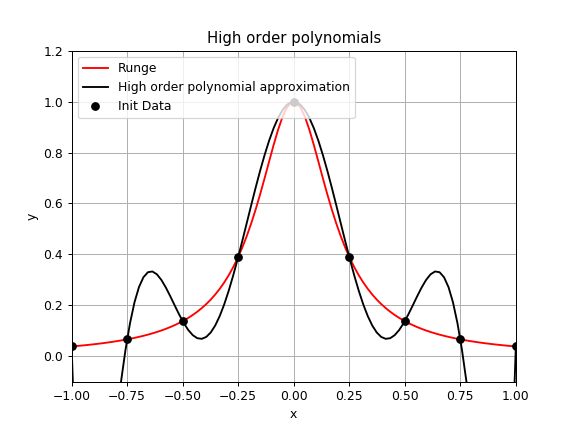

In [212]:
xmin, xmax =-1., 1.
# First we declare the number of points of the interpolation and we identify them
npoints = 9
x_raw = np.linspace(xmin,xmax,npoints)
y_raw = runge(x_raw)
# Then we send those points to your function to determine the coefficient of the polynomial form
coef_poly = coefs(x_raw,y_raw)
#Then we send them to the creating polynomial function
Npts = 100
x = np.linspace(xmin,xmax,Npts)
y_pol2 = poly_eval2(x,coef_poly)

fig, bx = plt.subplots()
bx.plot(x, runge(x),'r-', label="Runge")
bx.plot(x, poly_eval2(x, coef_poly),'k-',label="High order polynomial approximation")
bx.plot(x_raw, y_raw,'ko',label="Init Data")
bx.set_xlim(xmin,xmax)
bx.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('High order polynomials')
plt.grid()
plt.legend(loc="upper left")
plt.show()

You can see on the graph the highs fluctuations of values on both extremities of the domain. This is called Runge's phenomenon in the mathematical field of numerical analysis.
Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. It was discovered by Carl David Tolmé Runge (1901).The discovery was important because it shows that going to higher degrees does not always improve accuracy.

An idea to improve accuracy constists in changing the repartitions of the data points.  
For exemple, we can use the arctan function in order to put more points on the extremities.

Plot the arctan function

<IPython.core.display.Javascript object>


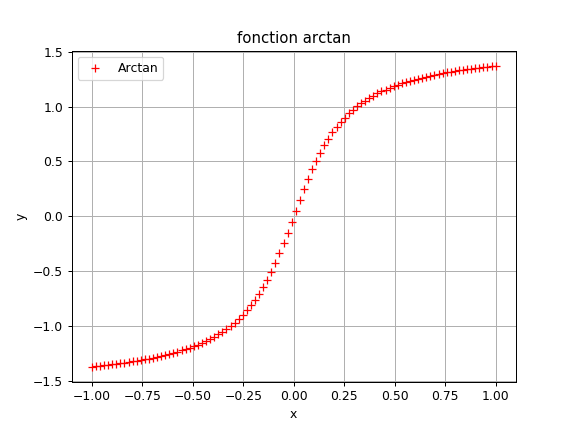

In [202]:
#You can reuse the prior x and add a coefficient in the function
coeff_arctan = 5.
y = np.arctan(coeff_arctan*x)

plt.figure("Arctan")
plt.plot(x,y,'+r',label='Arctan')
plt.xlabel("x")
plt.ylabel("y")
plt.title('fonction arctan')
plt.legend(loc='best')
plt.grid(True)
plt.show()

As you can see the function evovle slowly at the beginning, quikly in the middle and slowly again at the end.
Applying this function on the uniform `x` coordinate will produce new coordinate with more points at the start/end.

You can adjust the coefficient and the number of data points

<IPython.core.display.Javascript object>


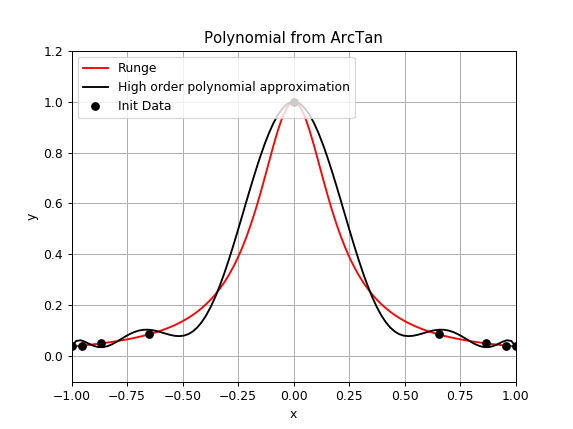

In [215]:
arctan_coef = 2
#Declaration of data
npoints=11
x_raw = np.linspace(xmin,xmax,npoints)
y_raw = runge(x_raw)
x_atan = np.arctan(arctan_coef*x_raw)
x_atan /= np.max(x_atan) 
y_atan = runge(x_atan)
coef_atan = coefs(x_atan,y_atan)

fig, cx = plt.subplots()

cx.plot(x, runge(x),'r-', label="Runge")
cx.plot(x, poly_eval2(x, coef_atan),'k-',label="High order polynomial approximation")
cx.plot(data_x2, data_y2,'ko',label="Init Data" )
cx.set_xlim(xmin,xmax)
cx.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial from ArcTan')
plt.grid()
plt.legend(loc="upper left")
plt.show()

# Spline Interpolation (scipy)

We saw that define some points along the function that we want to interpolate with respect to the trend of this one, as done with the $arctan(ax)$ function to set the positioning is not the easiest way to get a satisfactory result.  
Another way to do this could be to set various Polynomial form along the function that we would have previously split according to its trend to get a better approximation.  
This will be the aim of this part, use a spline algorithm to split it and get the most accurate solution.x

So the black curve is computed from the equation that you see on other part to follow as perfectly as possible the data from experiments that have been obtained.  
This is called in maths a Spline.

In [218]:
from scipy.interpolate import make_interp_spline

Use this package to compute a spline approximation of the runge function

In [228]:
interp = make_interp_spline(x_raw,runge(x_raw),k=3)
y_interp = interp(x)

Plot the result. You can also play with the coefficient of this package.

<IPython.core.display.Javascript object>


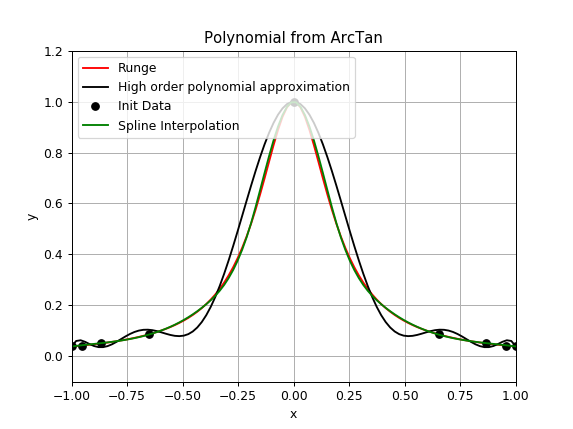

In [229]:
fig, dx = plt.subplots()

dx.plot(x, runge(x),'r-', label="Runge")
dx.plot(x, poly_eval2(x, coef_atan),'k-',label="High order polynomial approximation")
dx.plot(data_x2, data_y2,'ko',label="Init Data" )
dx.plot(x,y_interp,'-g',label="Spline Interpolation")
dx.set_xlim(xmin,xmax)
dx.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial from ArcTan')
plt.grid()
plt.legend(loc="upper left")
plt.show()

A method to check the accuracy of the interpolation would have been to use integration technics.  
This is the pupose of the next TP.

A good example of spline interpolation in research is the Drag Coefficient with regard to the Reynolds. Many scientists investigated on this topic so a lot of data from experiment have been found. The fact is that it's impossible to generalize a curve on the whole domain, so empirical laws have been written.  
Using those general laws give now a general corelation of the Drag Coefficient and obviously help a lot.

<table>
    <tr>
        <td> <img src="StokesLaw.png" alt="Flowchart" style="height: 420px"/> </td>
        <td> <img src="Equation.png" alt="Flowchart" style="height: 420px;"/> </td>
    </tr>
</table>

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>